In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import pandas as pd
import csv
import os
import seaborn as sns

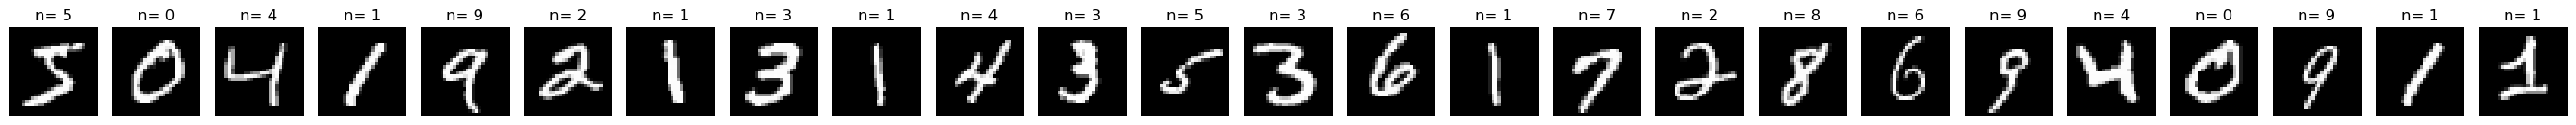

In [2]:
# 2.1 Images
transform = transforms.Compose([transforms.ToTensor()])

mnist_pytorch = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader_pytorch = torch.utils.data.DataLoader(mnist_pytorch, batch_size=1, shuffle=False)

plt.figure(figsize=(28, 28))

for i, (image, label) in enumerate(train_loader_pytorch):
    if i < 25:
        plt.subplot(25, 25, i + 1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"n= {label.item()}")   #using label "N: " so that the labels are legible
        plt.axis('off')
    else:
        break

plt.tight_layout()
plt.show()

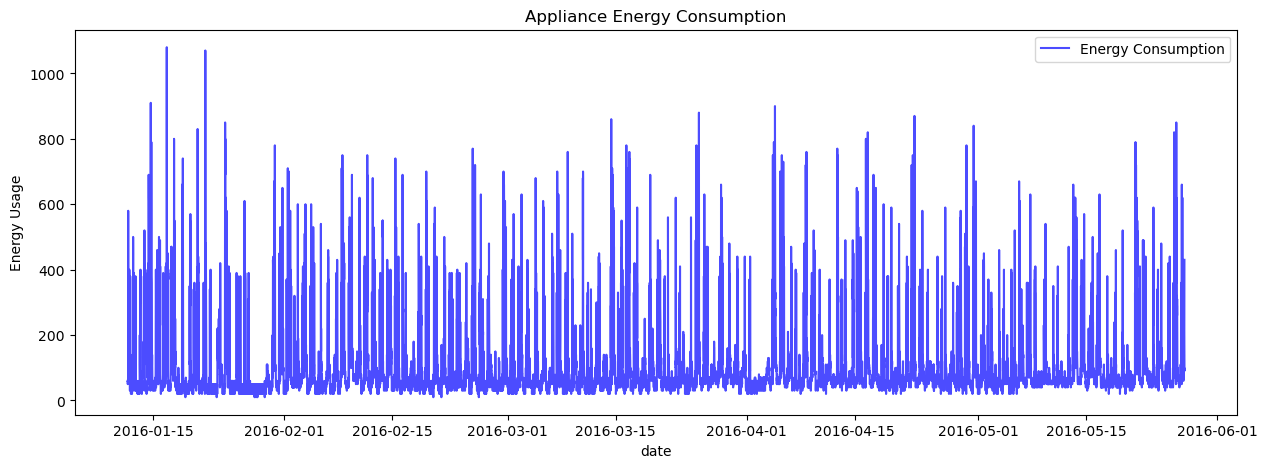

In [3]:
#2.2 Time Series Energy Data
file_path = "C:\Mark's Python files\ME5920\energydata_complete.csv"

df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

#plotting energy consumption for the whole period of dataset
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Appliances'], color='blue', alpha=0.7, label='Energy Consumption')
plt.xlabel('date')
plt.ylabel('Energy Usage')
plt.title('Appliance Energy Consumption')
plt.legend()
plt.show()

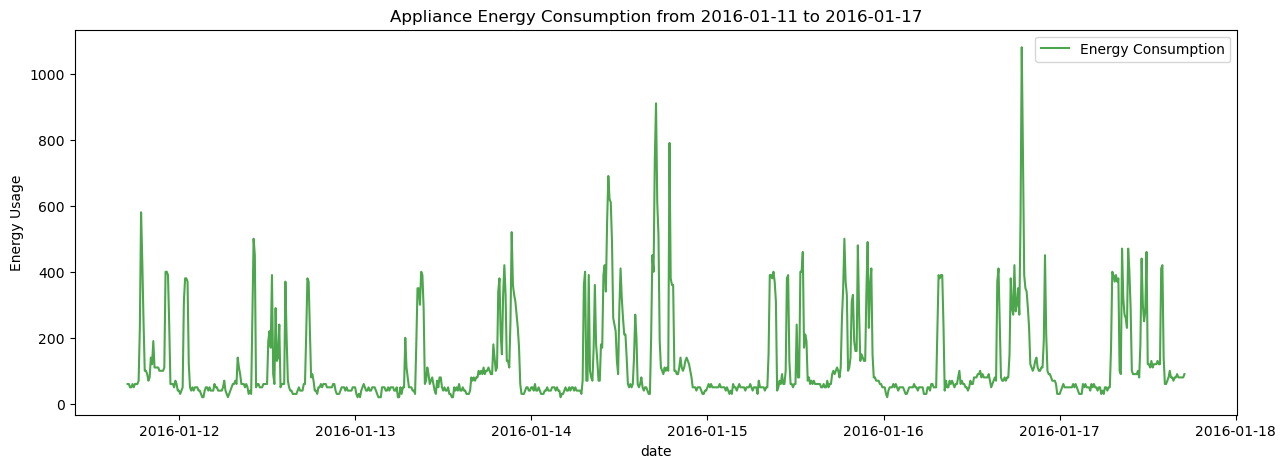

In [4]:
#taking a closer look at one week of energy consumption
week_start = df.index.min()
one_week_usage = df.loc[week_start:week_start + pd.Timedelta(days = 6)]

#plot one week usage data
plt.figure(figsize = (15,5))
plt.plot(one_week_usage.index, one_week_usage['Appliances'], color='green', alpha=0.7, label='Energy Consumption')
plt.xlabel('date')
plt.ylabel('Energy Usage')
plt.title(f'Appliance Energy Consumption from {week_start.date()} to {(week_start+pd.Timedelta(days=6)).date()}')
#plt.xticks(rotation=45)
plt.legend()
plt.show()

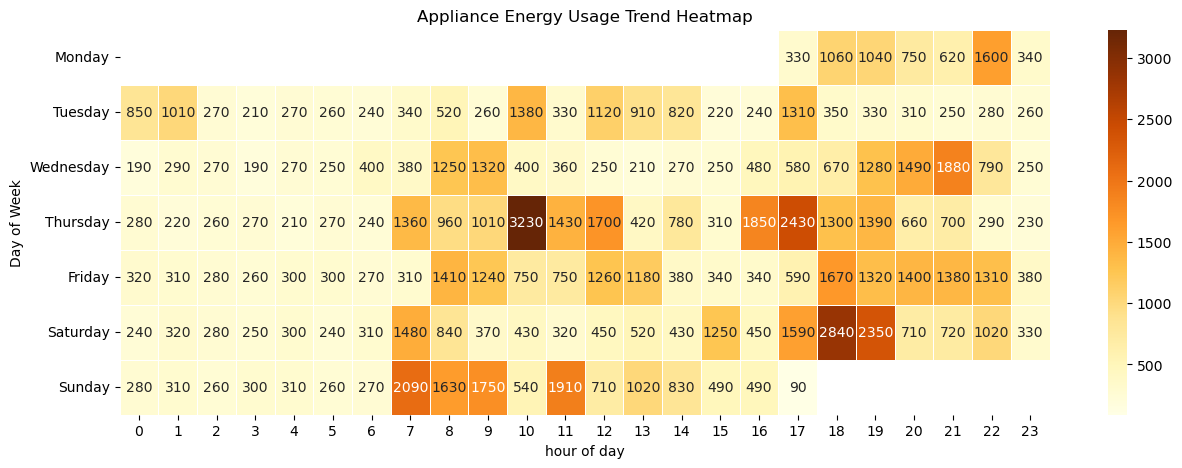

In [5]:
#2 - Heatmap
hourly = one_week_usage['Appliances'].resample('H').sum()
heatmap_data = hourly.reset_index()
heatmap_data['Day'] = heatmap_data['date'].dt.strftime('%A')
heatmap_data['Hour'] = heatmap_data['date'].dt.hour
pivot_heatmap = heatmap_data.pivot(index='Day', columns='Hour', values='Appliances')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap = pivot_heatmap.reindex(days)
#plotting heatmap
plt.figure(figsize=(15,5))
sns.heatmap(heatmap, cmap='YlOrBr', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel('hour of day')
plt.ylabel('Day of Week')
plt.title('Appliance Energy Usage Trend Heatmap')
plt.show()

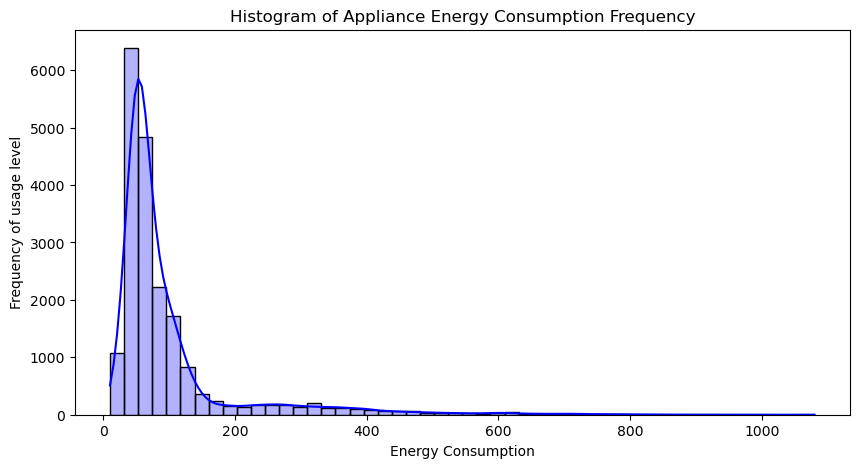

In [6]:
#3 Plotting histogram of entire dataset energy consumption from appliances
plt.figure(figsize=(10,5))
sns.histplot(df['Appliances'], bins=50, kde=True, color='blue', alpha=0.3)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency of usage level')
plt.title('Histogram of Appliance Energy Consumption Frequency')
plt.show()

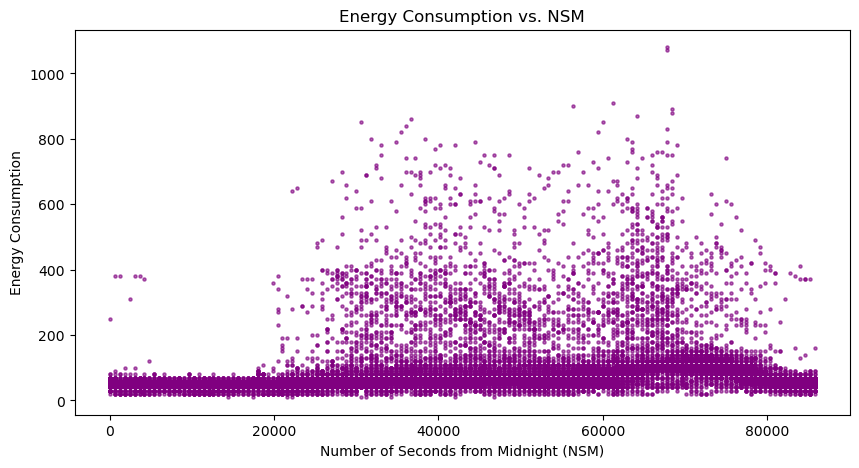

In [7]:
#4 Number of Seconds from Midnight vs. Energy usage
df = pd.read_csv(file_path) #needed to reload the dataframe after modifying it so much. Simplified the operation here using the base indeces
df['date'] = pd.to_datetime(df['date'])

df['NSM'] = df['date'].dt.hour * 3600 + df['date'].dt.minute * 60

plt.figure(figsize=(10,5))
plt.scatter(df['NSM'], df['Appliances'], alpha=0.6, color='purple', s=5)
plt.xlabel('Number of Seconds from Midnight (NSM)')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs. NSM')
plt.show()

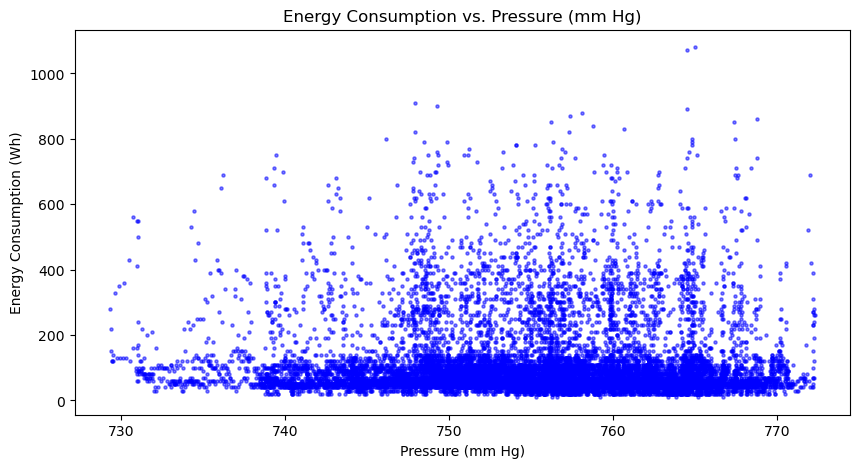

In [8]:
#5 - Plotting appliance energy consumption vs. Press_mm_Hg
plt.figure(figsize=(10,5))
plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.5, color='blue', s=5)
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Pressure (mm Hg)')
plt.show()

###Commenting on correlation: It seems as though energy consumption rises through out the day as seen in the Cons. vs. NSM plot
# which indicates that the appliances need to draw more power as the day goes on with the sun heating up the building
# This leads me to believe that the sun may also have an impact on the pressure throughout the day, but we do not see as strong 
# of a correlation. Therefore, I am led to believe that the pressure does not have as big of an impact on the power consumption,
# as say perhaps the humidity.

In [10]:
# 2.3 Multi-variate
from ucimlrepo import fetch_ucirepo 
from scipy.stats import kurtosis, skew

# fetch dataset 
airfoil_self_noise = fetch_ucirepo(id=291) 
  
# data (as pandas dataframes) 
X = airfoil_self_noise.data.features 
y = airfoil_self_noise.data.targets 
DF = pd.concat([X,y], axis=1)
# metadata 
#print(airfoil_self_noise.metadata) 
  
# variable information 
#print(airfoil_self_noise.variables) 

computed_stats = pd.DataFrame({
    "Mean": DF.mean(),
    "Variance": DF.var(),
    "Standard Deviation": DF.std(),
    "Median": DF.median(),
    "Kurtosis": DF.kurtosis(),
    "Skewness": DF.skew(),
    "Range": DF.max() - DF.min()
    })

print(computed_stats)

                                            Mean      Variance  \
frequency                            2886.380572  9.938717e+06   
attack-angle                            6.782302  3.502424e+01   
chord-length                            0.136548  8.749868e-03   
free-stream-velocity                   50.860745  2.425116e+02   
suction-side-displacement-thickness     0.011140  1.729287e-04   
scaled-sound-pressure                 124.835943  4.759146e+01   

                                     Standard Deviation       Median  \
frequency                                   3152.573137  1600.000000   
attack-angle                                   5.918128     5.400000   
chord-length                                   0.093541     0.101600   
free-stream-velocity                          15.572784    39.600000   
suction-side-displacement-thickness            0.013150     0.004957   
scaled-sound-pressure                          6.898657   125.721000   

                                